In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
current_path = os.getcwd()

In [3]:
current_path

'/Users/kuldeepchinwan/Projects/ML_Projects/customer-churn-prediction/notebooks'

In [4]:
os.chdir('..')

In [5]:
os.chdir('/Users/kuldeepchinwan/Projects/ML_Projects/customer-churn-prediction/data/raw')

In [6]:
raw_df = pd.read_csv('Telco_customer_churn.csv')

In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
raw_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
raw_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
#no null values, drop CustomerID column
raw_df.drop(columns =['customerID'], inplace = True)

In [11]:
raw_df['TotalCharges'] = pd.to_numeric(raw_df['TotalCharges'], errors = 'coerce')

In [12]:
raw_df['SeniorCitizen'].unique()

array([0, 1])

In [13]:
raw_df['SeniorCitizen'] = raw_df['SeniorCitizen'].astype(str)

In [14]:
# Identify numerical and categorical columns dynamically
numerical_features = raw_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = raw_df.select_dtypes(include=['object']).columns.tolist()

In [15]:
numerical_features

['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
categorical_features

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [17]:
raw_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [18]:
# apply loop check unique value without int or float in dataset
for col in raw_df.columns:
    if col in categorical_features:
        print(f'{col} : {raw_df[col].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : ['0' '1']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


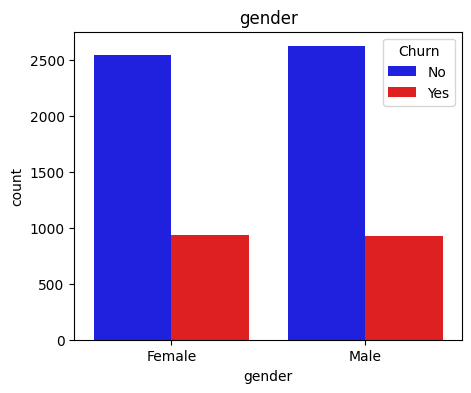

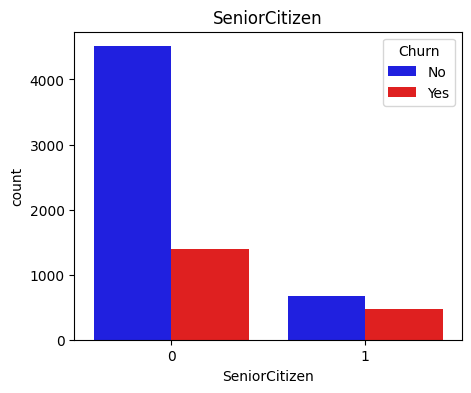

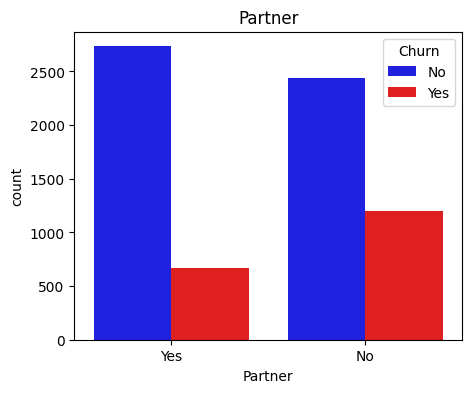

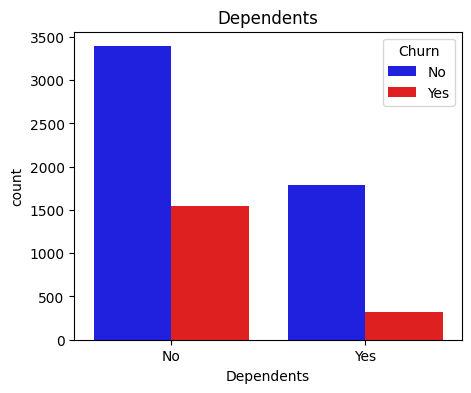

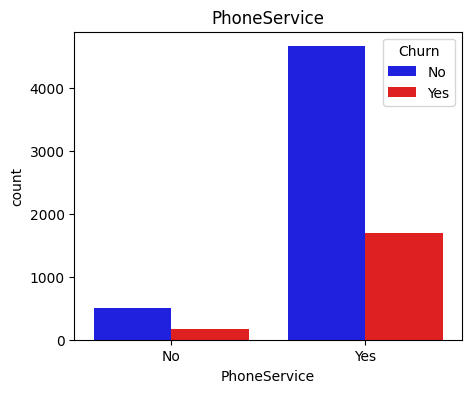

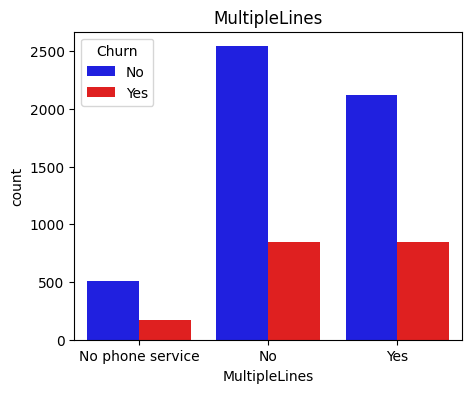

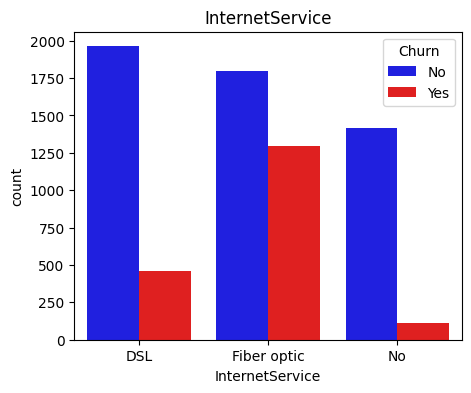

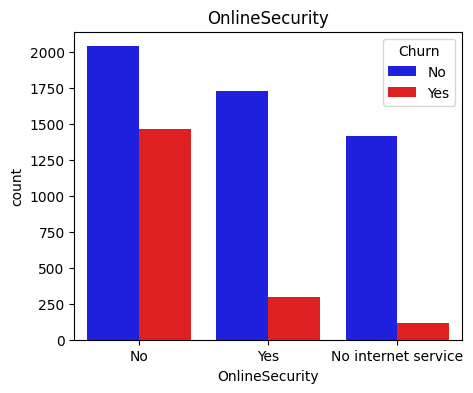

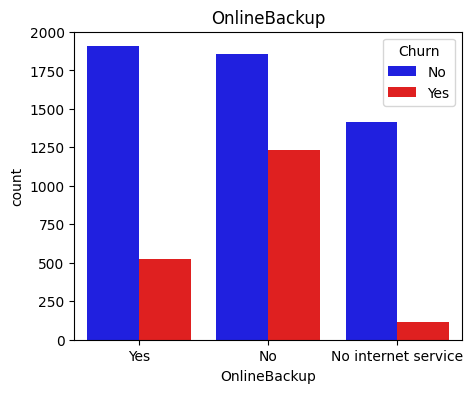

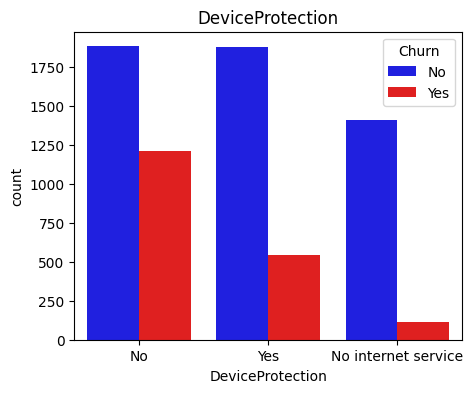

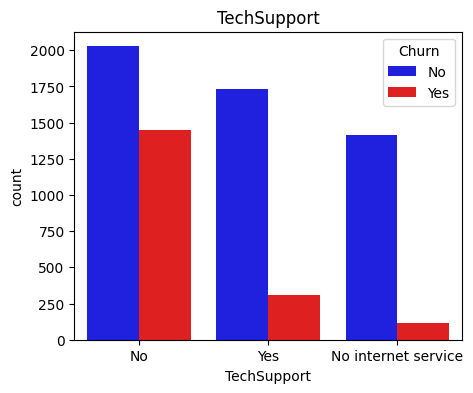

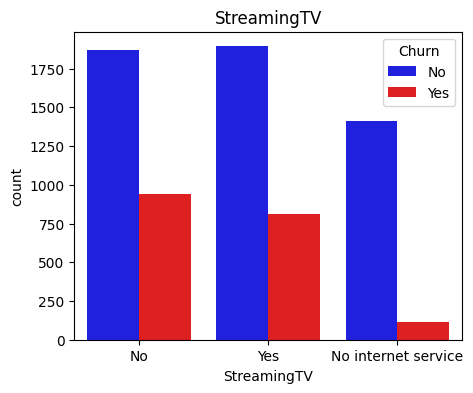

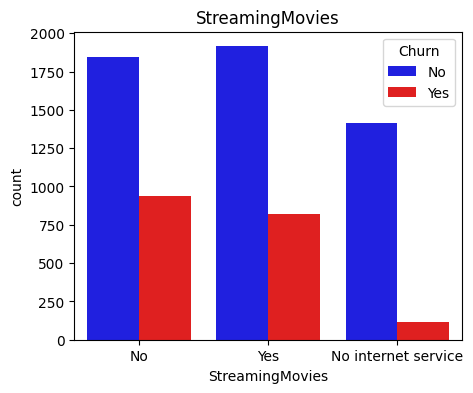

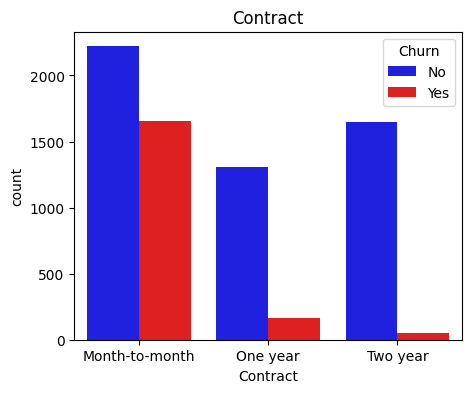

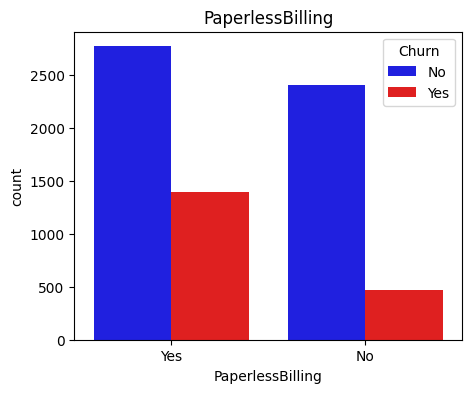

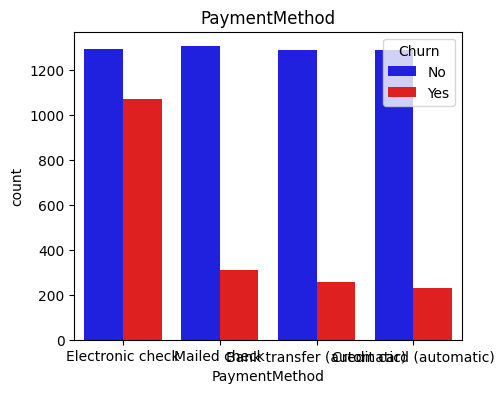

In [19]:
# Define colors for Yes and No
colors = {'Yes': 'red', 'No': 'blue'}


for i, predictor in enumerate(raw_df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(i, figsize=(5, 4))
    sns.countplot(data=raw_df, x=predictor, hue='Churn', palette=colors)
    plt.title(predictor)
    plt.show()

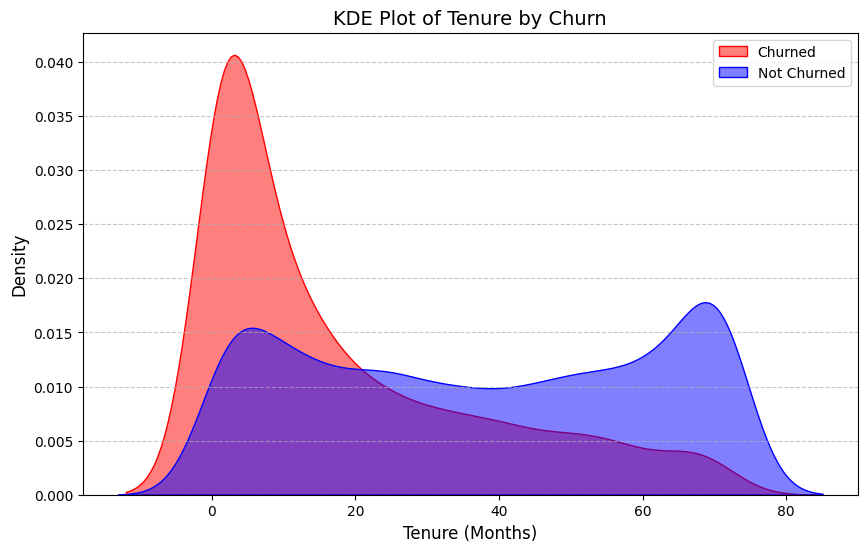

In [20]:
# make plot for tenure
churned = raw_df[raw_df['Churn'] == 'Yes']
not_churned = raw_df[raw_df['Churn'] == 'No']

# Plotting
# KDE Plot for a smooth distribution view
plt.figure(figsize=(10, 6))
sns.kdeplot(churned['tenure'], color='red', label='Churned', fill=True, alpha=0.5)
sns.kdeplot(not_churned['tenure'], color='blue', label='Not Churned', fill=True, alpha=0.5)

plt.title('KDE Plot of Tenure by Churn', fontsize=14)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

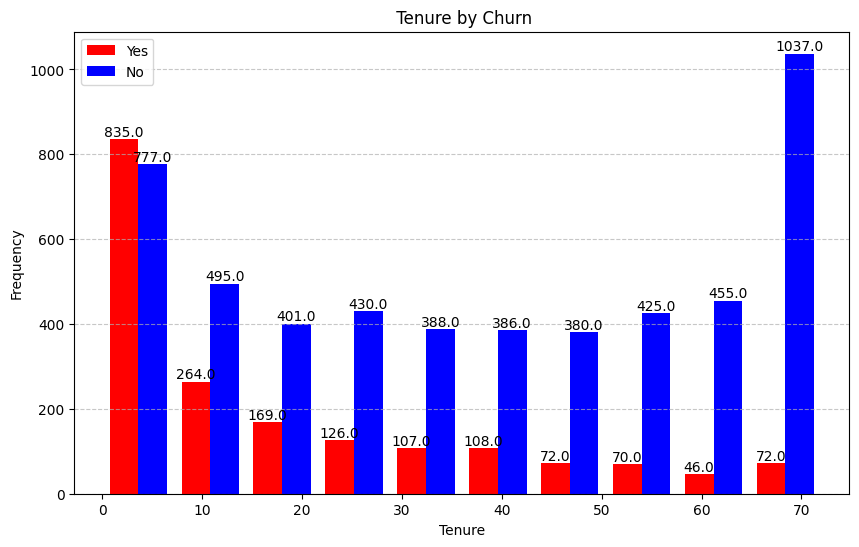

In [21]:

# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['tenure'], not_churned['tenure']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' Tenure by Churn')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

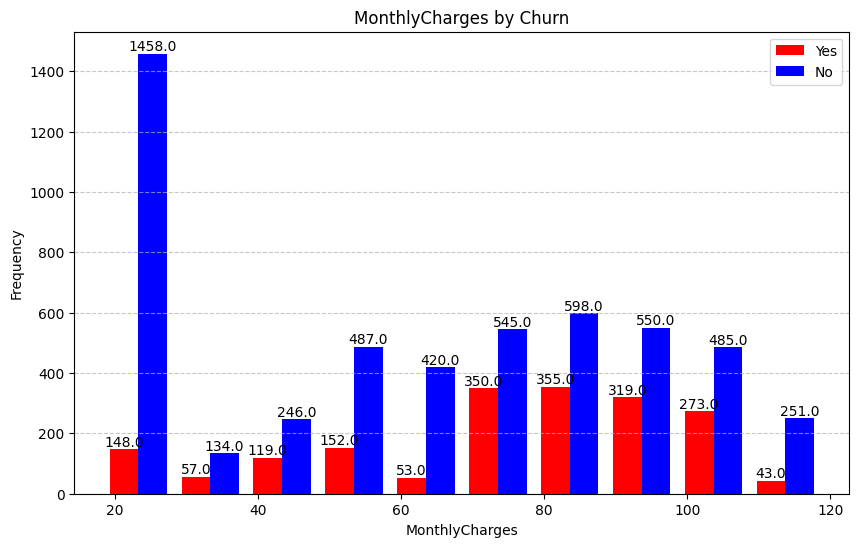

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['MonthlyCharges'], not_churned['MonthlyCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title('MonthlyCharges by Churn')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

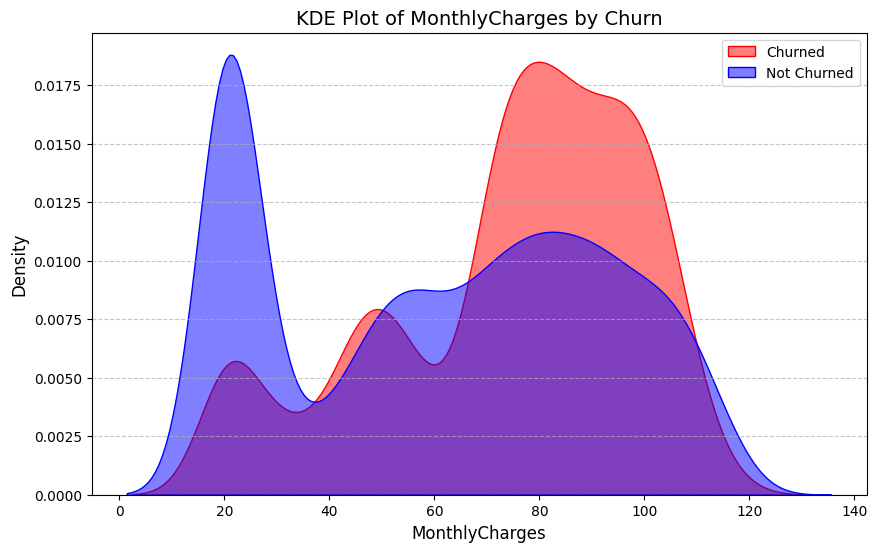

In [23]:
# KDE Plot for a smooth distribution view
plt.figure(figsize=(10, 6))
sns.kdeplot(churned['MonthlyCharges'], color='red', label='Churned', fill=True, alpha=0.5)
sns.kdeplot(not_churned['MonthlyCharges'], color='blue', label='Not Churned', fill=True, alpha=0.5)

plt.title('KDE Plot of MonthlyCharges by Churn', fontsize=14)
plt.xlabel('MonthlyCharges', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

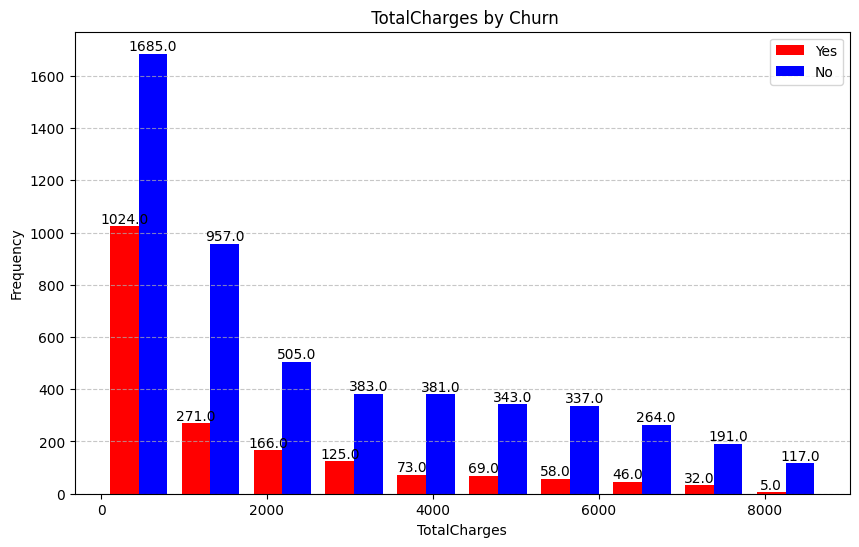

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist([churned['TotalCharges'], not_churned['TotalCharges']], bins=10, color=['red', 'blue'], label=['Yes', 'No'])
plt.title(' TotalCharges by Churn')
plt.xlabel('TotalCharges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Add text on top of bars
for rect in plt.gca().patches:
    height = rect.get_height()
    plt.gca().text(rect.get_x() + rect.get_width() / 2, height, height, ha='center', va='bottom')

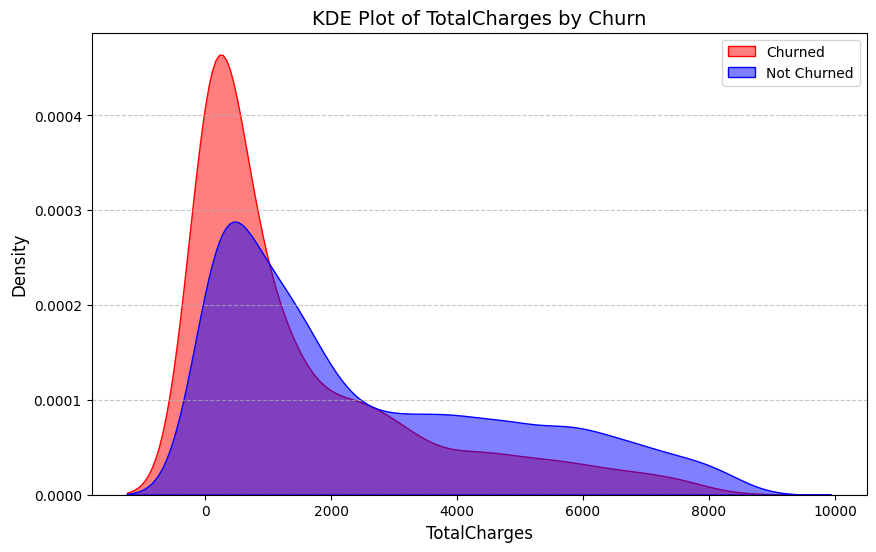

In [25]:
# KDE Plot for a smooth distribution view
plt.figure(figsize=(10, 6))
sns.kdeplot(churned['TotalCharges'], color='red', label='Churned', fill=True, alpha=0.5)
sns.kdeplot(not_churned['TotalCharges'], color='blue', label='Not Churned', fill=True, alpha=0.5)

plt.title('KDE Plot of TotalCharges by Churn', fontsize=14)
plt.xlabel('TotalCharges', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()